#Tq

## Importing the libs

In [1]:
import numpy as np 
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab.patches import cv2_imshow
from skimage.io import imread, imsave, imshow
from skimage.transform import resize
from sklearn.cluster import MiniBatchKMeans, KMeans
from skimage.color import rgb2gray, gray2rgb, rgb2lab, lab2rgb
import sklearn.neighbors as nn

## Global Var

In [ ]:
resDirPath = '/content/drive/MyDrive/Image Colorization/resources'
labFilePath = '/content/drive/MyDrive/Image Colorization/resources/LAB.npy'
imgPath = '/content/test9.jpg'

In [ ]:
lab = np.load(labFilePath)

In [ ]:
print(f'Shape of LAB color-Space : {lab.shape}')

Shape of LAB color-Space : (16777201, 3)


In [ ]:
# displaying the any 10 rows
lab[600000:600010]

array([[ 27.60903189,  50.78363933, -79.45611365],
       [ 27.73034668,  51.11258364, -79.84421087],
       [ 27.85180845,  51.44059908, -80.23150034],
       [ 27.97341448,  51.76769333, -80.61798967],
       [ 28.0951621 ,  52.09387399, -81.00368635],
       [ 28.21704868,  52.41914864, -81.38859779],
       [ 28.33907161,  52.7435248 , -81.77273133],
       [ 28.46122835,  53.06700995, -82.15609419],
       [ 28.58351636,  53.3896115 , -82.53869351],
       [ 28.70593316,  53.71133685, -82.92053635]])

## Plotting the LAB (AB Gamut)

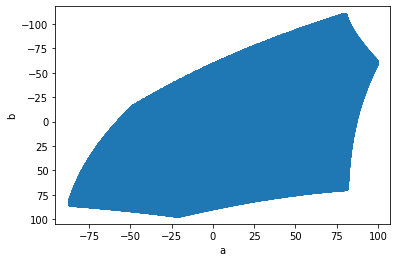

In [ ]:
fig = plt.figure()
# fig.set_figwidth(8)
# fig.set_figheight(4)
plt.scatter(x=lab[:,1], y=lab[:,2])
plt.xlabel('a')
plt.ylabel('b')
plt.gca().invert_yaxis()
plt.show()

## Trying the Image Quantization on the Images KMeans and cv2

In [ ]:
imgCV = cv2.imread(imgPath)

In [ ]:
cv2_imshow(imgCV)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
imgCV = cv2.resize(imgCV, (512,365))

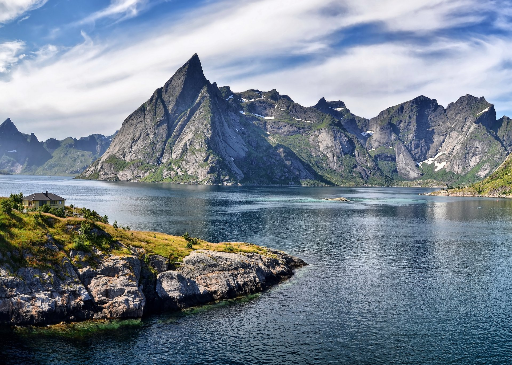

In [ ]:
cv2_imshow(imgCV)

In [ ]:
h, w = imgCV.shape[:2]

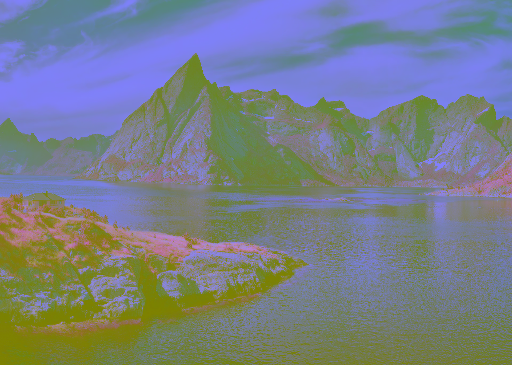

In [ ]:
# converting the image into LAB image
imgCVLab = cv2.cvtColor(imgCV, cv2.COLOR_BGR2LAB)
cv2_imshow(imgCVLab)

In [ ]:
# reshape image into a featrue vector for k-means
rlab =  imgCVLab.reshape((imgCVLab.shape[0]*imgCVLab.shape[1],3))

In [ ]:
rlab.shape

(186880, 3)

In [ ]:
rlab

array([[223, 128, 124],
       [225, 129, 124],
       [227, 129, 124],
       ...,
       [ 68, 124, 111],
       [ 23, 128, 111],
       [ 65, 121, 112]], dtype=uint8)

In [ ]:
# applying the kmeans and create the quantized image

In [ ]:
clf = KMeans(n_clusters = 8)

In [ ]:
labels = clf.fit_predict(rlab)

In [ ]:
quanta = clf.cluster_centers_.astype('uint8')[labels]

In [ ]:
rquanta = quanta.reshape((h,w,3))

In [ ]:
quantized = cv2.cvtColor(rquanta, cv2.COLOR_LAB2BGR)

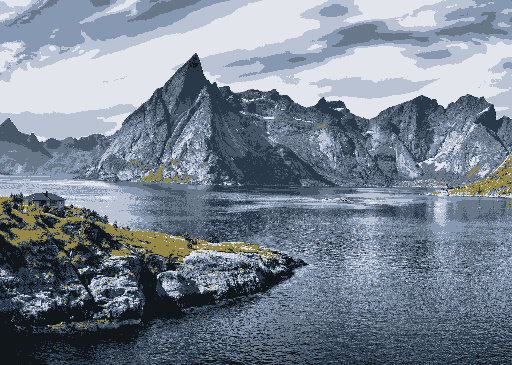

In [ ]:
cv2_imshow(quantized)

In [ ]:
len(labels)

186880

In [ ]:
quanta.shape

(186880, 3)

In [ ]:
clf.cluster_centers_

array([[145.82072108, 124.93660856, 165.13549921],
       [200.3316826 , 128.78129679, 119.49234136],
       [ 59.03196465, 127.86137212, 115.3191745 ],
       [ 93.92010384, 126.40773724, 117.40243727],
       [160.6714793 , 127.47420608, 113.30661262],
       [127.43569277, 126.3026506 , 117.68355422],
       [232.9056084 , 129.07621111, 124.30341205],
       [ 17.45494779, 127.50764124, 124.36311458]])

In [ ]:
centers = clf.cluster_centers_

In [ ]:
centers.shape

(8, 3)

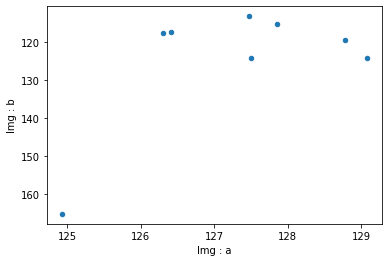

In [ ]:
plt.scatter(centers[:,1], centers[:,2], s=20)
plt.xlabel('Img : a')
plt.ylabel('Img : b')
plt.gca().invert_yaxis()
plt.show()

## Trying the image quantization using KMeans and Skimage

In [ ]:
imgSki = imread(imgPath)

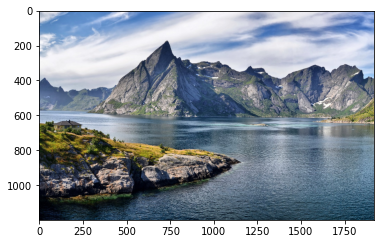

In [ ]:
plt.imshow(imgSki)

In [ ]:
imgSki = resize(imgSki, (365,512))

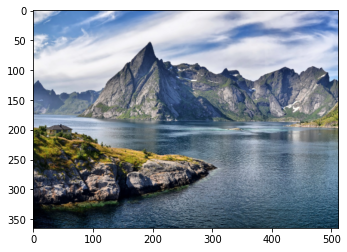

In [ ]:
plt.imshow(imgSki)

In [ ]:
# converting the image into LAB
labSki = rgb2lab(imgSki)

In [ ]:
labSki.shape

(365, 512, 3)

In [ ]:
labSki

array([[[ 8.66978613e+01,  3.78462999e-01, -4.09355196e+00],
        [ 8.73575847e+01,  7.61828426e-01, -4.08951095e+00],
        [ 8.84067113e+01,  1.12680093e+00, -4.01874276e+00],
        ...,
        [ 5.80722459e+01,  5.90425438e+00, -3.61868793e+01],
        [ 5.76440272e+01,  5.95882034e+00, -3.72211763e+01],
        [ 5.47942117e+01,  6.32758431e+00, -3.79739966e+01]],

       [[ 8.34335905e+01,  3.01130421e-01, -5.25814634e+00],
        [ 8.41057145e+01,  7.55632866e-01, -5.51784967e+00],
        [ 8.43409242e+01,  1.10051297e+00, -5.43207404e+00],
        ...,
        [ 6.13696197e+01,  5.35437481e+00, -3.50426572e+01],
        [ 5.90134199e+01,  5.33928597e+00, -3.60952057e+01],
        [ 5.65629609e+01,  5.57247171e+00, -3.68090614e+01]],

       [[ 7.92868256e+01, -7.68212755e-02, -7.22003736e+00],
        [ 7.92244700e+01,  5.95743716e-01, -7.53186871e+00],
        [ 7.97895101e+01,  6.67244881e-01, -7.35595602e+00],
        ...,
        [ 6.31380486e+01,  5.06666197e+00,

In [ ]:
rlabSki = labSki.reshape((labSki.shape[0]*labSki.shape[1], 3))

In [ ]:
rlabSki.shape

(186880, 3)

In [ ]:
rlabSki

array([[ 86.69786134,   0.378463  ,  -4.09355196],
       [ 87.35758473,   0.76182843,  -4.08951095],
       [ 88.40671129,   1.12680093,  -4.01874276],
       ...,
       [ 23.16293103,  -3.43439081, -17.25862891],
       [ 11.87825509,  -1.78357192, -16.87874034],
       [ 21.53511107,  -6.07193883, -16.37102556]])

In [ ]:
kmeans = KMeans(n_clusters=8)

In [ ]:
label = kmeans.fit_predict(rlabSki)

In [ ]:
quant = kmeans.cluster_centers_.astype('float32')[label]

In [ ]:
rquant= quant.reshape((h,w,3))

In [ ]:
rquant

array([[[ 8.9822777e+01,  1.2244893e+00, -3.6963754e+00],
        [ 8.9822777e+01,  1.2244893e+00, -3.6963754e+00],
        [ 8.9822777e+01,  1.2244893e+00, -3.6963754e+00],
        ...,
        [ 5.9232651e+01,  2.3670237e+00, -3.1190491e+01],
        [ 5.9232651e+01,  2.3670237e+00, -3.1190491e+01],
        [ 5.9232651e+01,  2.3670237e+00, -3.1190491e+01]],

       [[ 8.9822777e+01,  1.2244893e+00, -3.6963754e+00],
        [ 8.9822777e+01,  1.2244893e+00, -3.6963754e+00],
        [ 8.9822777e+01,  1.2244893e+00, -3.6963754e+00],
        ...,
        [ 5.9232651e+01,  2.3670237e+00, -3.1190491e+01],
        [ 5.9232651e+01,  2.3670237e+00, -3.1190491e+01],
        [ 5.9232651e+01,  2.3670237e+00, -3.1190491e+01]],

       [[ 7.6173561e+01,  4.8592347e-01, -1.1606694e+01],
        [ 7.6173561e+01,  4.8592347e-01, -1.1606694e+01],
        [ 7.6173561e+01,  4.8592347e-01, -1.1606694e+01],
        ...,
        [ 5.9232651e+01,  2.3670237e+00, -3.1190491e+01],
        [ 5.9232651e+01,  2.3

In [ ]:
quantImg = lab2rgb(rquant)

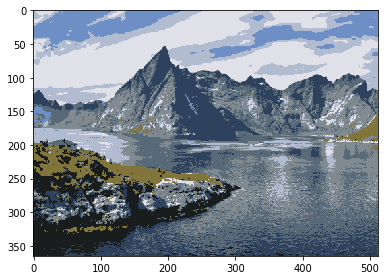

In [ ]:
imshow(quantImg)

In [ ]:
center = kmeans.cluster_centers_

In [ ]:
center.shape

(8, 3)

In [ ]:
center

array([[ 1.05384556e+01, -1.10042504e+00, -1.29916191e+00],
       [ 7.61735610e+01,  4.85923473e-01, -1.16066940e+01],
       [ 4.36421268e+01, -2.37287837e+00, -1.05690735e+01],
       [ 5.72599772e+01, -1.46015921e+00, -4.45792590e+00],
       [ 8.98227740e+01,  1.22448931e+00, -3.69637546e+00],
       [ 5.92326511e+01,  2.36702382e+00, -3.11904900e+01],
       [ 4.94595085e+01, -3.05037841e+00,  3.36701902e+01],
       [ 2.78156222e+01,  7.84518231e-02, -1.79918030e+01]])

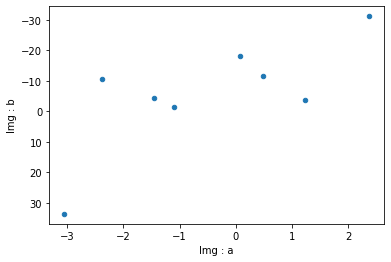

In [ ]:
plt.scatter(center[:,1], center[:,2], s=20)
plt.xlabel('Img : a')
plt.ylabel('Img : b')
plt.gca().invert_yaxis()
plt.show()

## Performing the Kmeans Clustering of LAB Gamut

In [ ]:
LAB = lab.copy()

In [ ]:
LAB.shape

(16777201, 3)

In [ ]:
testLAB = np.zeros(shape=(16777201,2))

In [ ]:
testLAB.shape

(16777201, 2)

In [ ]:
testLAB[:,0] = LAB[:,1] 
testLAB[:,1] = LAB[:,2] 

In [ ]:
# intializing the Kmeans Cluster
clt = MiniBatchKMeans(n_clusters=929)

In [ ]:
_labels = clt.fit_predict(testLAB)

In [ ]:
bin_centers = clt.cluster_centers_

In [ ]:
bin_centers.shape

(929, 2)

In [ ]:
np.round(bin_centers)

array([[ 42., -13.],
       [ 46., -48.],
       [ 13.,  61.],
       ...,
       [-13.,  74.],
       [ 56., -75.],
       [ 23.,  23.]])

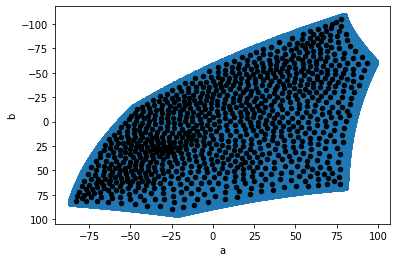

In [ ]:
plt.scatter(x=lab[:,1], y=lab[:,2])
plt.scatter(bin_centers[:,0], bin_centers[:,1], s=20, c='black')
plt.xlabel('a')
plt.ylabel('b')
plt.gca().invert_yaxis()
plt.show()

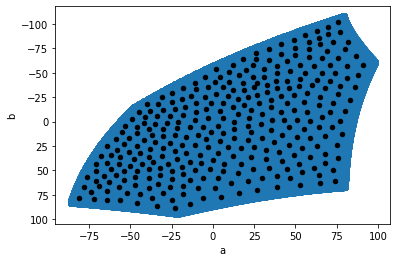

In [ ]:
plt.scatter(x=lab[:,1], y=lab[:,2])
plt.scatter(np.round(bin_centers[:,0]), np.round(bin_centers[:,1]), s=20, c='black')
plt.xlabel('a')
plt.ylabel('b')
plt.gca().invert_yaxis()
plt.show()

## Trying histogram Method for Quantization

In [ ]:
H, xedges, yedges = np.histogram2d(x=LAB[:,1], y=LAB[:,2], bins=np.arange(-110,110,10))

In [ ]:
xedges.shape

(22,)

In [ ]:
yedges.shape

(22,)

In [ ]:
xedges

array([-110, -100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,
          0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100])

In [ ]:
yedges

array([-110, -100,  -90,  -80,  -70,  -60,  -50,  -40,  -30,  -20,  -10,
          0,   10,   20,   30,   40,   50,   60,   70,   80,   90,  100])

In [ ]:
H.shape

(21, 21)

In [ ]:
H

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 2.12000e+02, 9.07200e+03, 4.32360e+04, 1.71920e+04,
        0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00

In [ ]:
bins = []
for i in range(21):
    for j in range(21):
        if H[i,j] > 0:
            bins.append([xedges[i], yedges[j]])
bins = np.asarray(bins)

In [ ]:
bins.shape

(268, 2)

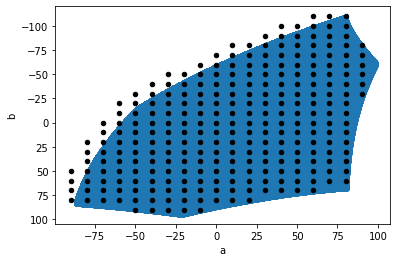

In [ ]:
plt.scatter(x=lab[:,1], y=lab[:,2])
plt.scatter(bins[:,0], bins[:,1], s=20, c='black')
plt.xlabel('a')
plt.ylabel('b')
plt.gca().invert_yaxis()
plt.show()

## Points Extraction 

In [181]:
d1 = [-110,-90,-50,0,40,30,50,100,110,120]

In [182]:
d2 = [-70,-80,-60,10,30,60,70,80,90,100]

In [183]:
data1 = []
for i in d1:
    for j in d2:
        data1.append([i, j])

# converting it into the np array 
data1 = np.asarray(data1)

In [184]:
data1.shape

(100, 2)

In [185]:
d3 = [-110,-90,-70,0,40,30,50,90,100,110]

In [186]:
d4 = [-70,-80,-60,10,20,30,70,80,90]

In [187]:
data2 = []
for i in d3:
    for j in d4:
        data2.append([i, j])

# converting it into the np array 
data2 = np.asarray(data2)

In [188]:
data2.shape

(90, 2)

In [189]:
def getDictFromData(data):
    _d = dict()
    for d in data:
        #  getting the values of A and B
        a = d[0]
        b = d[1]
        
        if _d.get(a) == None:
            _d.update({a : [b]})
        else:
            vals = _d.get(a)

            if b not in vals:
                vals.append(b)
                _d.update({a:vals})
    return _d

In [190]:
dict1 = getDictFromData(data1)
print(dict1)

{-110: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100], -90: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100], -50: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100], 0: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100], 40: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100], 30: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100], 50: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100], 100: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100], 110: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100], 120: [-70, -80, -60, 10, 30, 60, 70, 80, 90, 100]}


In [191]:
dict2 = getDictFromData(data2)
print(dict2)

{-110: [-70, -80, -60, 10, 20, 30, 70, 80, 90], -90: [-70, -80, -60, 10, 20, 30, 70, 80, 90], -70: [-70, -80, -60, 10, 20, 30, 70, 80, 90], 0: [-70, -80, -60, 10, 20, 30, 70, 80, 90], 40: [-70, -80, -60, 10, 20, 30, 70, 80, 90], 30: [-70, -80, -60, 10, 20, 30, 70, 80, 90], 50: [-70, -80, -60, 10, 20, 30, 70, 80, 90], 90: [-70, -80, -60, 10, 20, 30, 70, 80, 90], 100: [-70, -80, -60, 10, 20, 30, 70, 80, 90], 110: [-70, -80, -60, 10, 20, 30, 70, 80, 90]}


In [192]:
dict1.keys()

dict_keys([-110, -90, -50, 0, 40, 30, 50, 100, 110, 120])

In [193]:
dict2.keys()

dict_keys([-110, -90, -70, 0, 40, 30, 50, 90, 100, 110])

In [194]:
def getAllKeys(_d1, _d2):
    _keys = []
    for k1, k2 in zip(_d1.keys(), _d2.keys()):
        if k1 == k2:
            if k1 not in _keys:
                _keys.append(k1)
        else:
            if k1 not in _keys:
                _keys.append(k1)
            if k2 not in _keys:
                _keys.append(k2)
    _keys.sort()
    return _keys

In [195]:
dict_keys = getAllKeys(dict1,dict2)

In [196]:
dict_keys

[-110, -90, -70, -50, 0, 30, 40, 50, 90, 100, 110, 120]

In [206]:
def getPtsDict(_dt1, _dt2, _keys):
    ptsDict = dict()

    # inserting the key with empty list in ptsDict
    for key in _keys:
        ptsDict.update({key:[]})


    for key in _keys:
        val1 = _dt1.get(key)
        val2 = _dt2.get(key)
        val = None
        if val1 != None and val2 != None:
            # taking the union of the set
            val = list(set(val1 + val2))
        elif val1 != None:
            val = val1
        elif val2 != None:
            val = val2
        
        val.sort()
        ptsDict.update({key:val})

    return ptsDict

In [209]:
pts = getPtsDict(dict1, dict2, dict_keys)

In [210]:
def generatePtsDataFromDict(_d):
    pts = []
    for key in _d.keys():
        for val in _d.get(key):
            pts.append([key, val])
    pts = np.asarray(pts)
    return pts


In [212]:
generatePtsDataFromDict(pts).shape

(126, 2)

#Func

In [ ]:
def getDictFromData(data):
    _d = dict()
    for d in data:
        #  getting the values of A and B
        a = d[0]
        b = d[1]
        
        if _d.get(a) == None:
            _d.update({a : [b]})
        else:
            vals = _d.get(a)

            if b not in vals:
                vals.append(b)
                _d.update({a:vals})
    return _d

In [ ]:
def getAllKeys(_d1, _d2):
    _keys = []
    for k1, k2 in zip(_d1.keys(), _d2.keys()):
        if k1 == k2:
            if k1 not in _keys:
                _keys.append(k1)
        else:
            if k1 not in _keys:
                _keys.append(k1)
            if k2 not in _keys:
                _keys.append(k2)
    _keys.sort()
    return _keys

In [ ]:
def getPtsDict(_dt1, _dt2, _keys):
    ptsDict = dict()

    # inserting the key with empty list in ptsDict
    for key in _keys:
        ptsDict.update({key:[]})


    for key in _keys:
        val1 = _dt1.get(key)
        val2 = _dt2.get(key)
        val = None
        if val1 != None and val2 != None:
            # taking the union of the set
            val = list(set(val1 + val2))
        elif val1 != None:
            val = val1
        elif val2 != None:
            val = val2
        
        val.sort()
        ptsDict.update({key:val})

    return ptsDict

In [ ]:
def generatePtsDataFromDict(_d):
    pts = []
    for key in _d.keys():
        for val in _d.get(key):
            pts.append([key, val])
    pts = np.asarray(pts)
    return pts
